<a href="https://colab.research.google.com/github/KendiKabuli/House-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This model predicts the price of a house based on features like number of rooms, size in square feet and the age


###Step 1: Import the libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


###Step 2:Load the dataset

In [7]:
df = pd.read_csv('/content/data.csv')
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

###Step 3: Select the features and the target

In [8]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built']]
y = df['price']

###Step 4: Splitting into training and testing

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###Step 5: Train the model

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

###Step 6: Predictions

In [11]:
y_pred = model.predict(x_test)

###Step 7: Evaluate the model

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 990512244942.1538
R-squared: 0.028763249905176647


###Step 8: Visualization

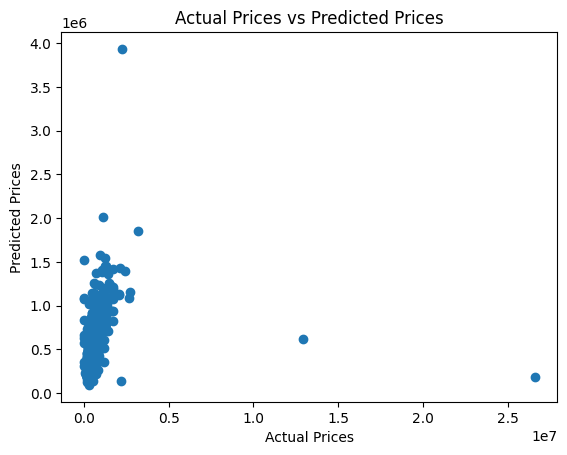

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

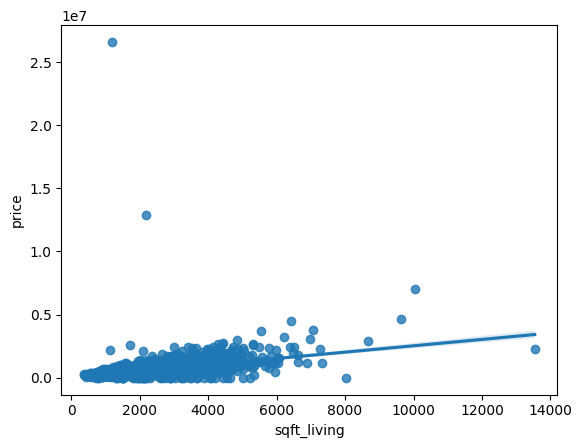

In [14]:
# Scatter plot with regression line
sns.regplot(x='sqft_living', y='price', data=df)
plt.show()

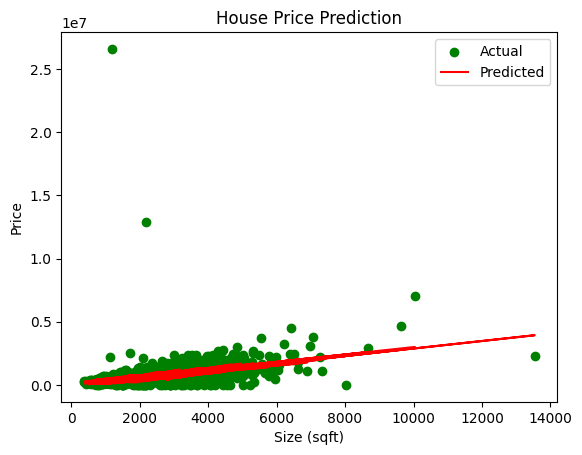

In [15]:
# Scatter plot for actual values
plt.scatter(df['sqft_living'], df['price'], color='green', label='Actual')

# Line plot for predicted values
plt.plot(df['sqft_living'], model.predict(df[['bedrooms','bathrooms','sqft_living','floors','yr_built']]), color='red', label='Predicted')

# Add labels, legend, title
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

In [16]:
# Predict prices for test set
y_pred = model.predict(x_test)

# Show first 5 predictions vs actual
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())


         Actual      Predicted
3683   544000.0  303081.928856
4411        0.0  310134.843585
2584  1712500.0  933292.814656
69     365000.0  517443.771909
1844   275000.0  391255.494019


In [20]:

new_house = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1400],
    'floors': [1],  # Assuming a value for floors
    'yr_built': [2000] # Assuming a value for year built
})

predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: {predicted_price[0]}")

Predicted price for the new house: 219618.48649657704


In [21]:
predicted_price = model.predict(new_house)
rounded_price = round(predicted_price[0], 2)
print(f"Predicted price for the new house: ${rounded_price}")


Predicted price for the new house: $219618.49


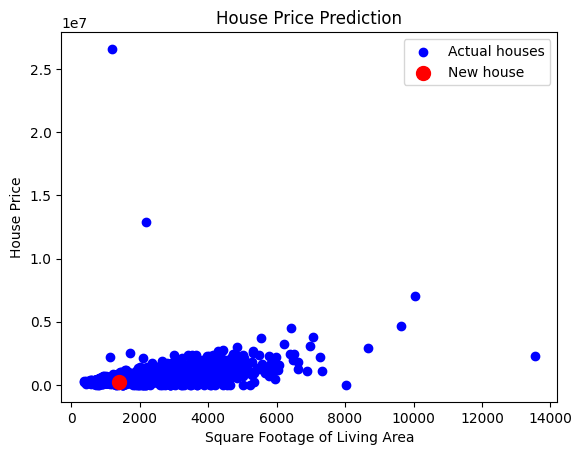

In [22]:
# Existing data
plt.scatter(df['sqft_living'], y, color='blue', label='Actual houses')

# Plot the predicted house
plt.scatter(new_house['sqft_living'], rounded_price, color='red', label='New house', s=100)

# Labels
plt.xlabel('Square Footage of Living Area')
plt.ylabel('House Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()


In [24]:

# New house features
new_house = pd.DataFrame({
    'bedrooms': [6],
    'bathrooms': [5],
    'sqft_living': [4500],
    'floors': [2],
    'yr_built': [2020]
})

# Predict price
predicted_price = model.predict(new_house)

# Round to 2 decimals
predicted_price = round(predicted_price[0], 2)

print(f"Predicted price for the new house: ${predicted_price}")


Predicted price for the new house: $1060131.24


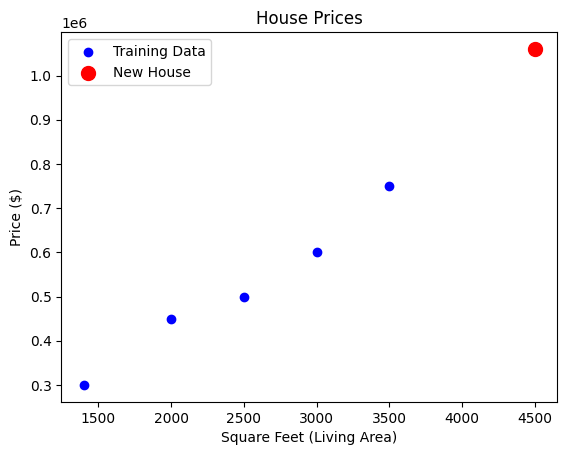

Predicted price for the new house: $1060131.24


In [27]:

# Example training data
data = pd.DataFrame({
    'sqft_living': [1400, 2000, 2500, 3000, 3500],
    'price': [300000, 450000, 500000, 600000, 750000]
})

# New house features
new_house = pd.DataFrame({
    'bedrooms': [6],
    'bathrooms': [5],
    'sqft_living': [4500],
    'floors': [2],
    'yr_built': [2020]
})

# Predict price
predicted_price = round(model.predict(new_house)[0], 2)

# Plot training data
plt.scatter(data['sqft_living'], data['price'], color='blue', label='Training Data')

# Plot new house
plt.scatter(new_house['sqft_living'], predicted_price, color='red', label='New House', s=100)

# Add labels and legend
plt.xlabel('Square Feet (Living Area)')
plt.ylabel('Price ($)')
plt.title('House Prices')
plt.legend()
plt.show()

print(f"Predicted price for the new house: ${predicted_price}")


In [29]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
"/content/drive/MyDrive/Colab Notebooks/HousePricePrediction"


'/content/drive/MyDrive/Colab Notebooks/HousePricePrediction'

In [31]:
!ls

data.csv  drive  sample_data


In [33]:
cd "/content/drive/MyDrive/Colab Notebooks"


/content/drive/MyDrive/Colab Notebooks
